#### Data Preparation

In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [130]:
#Create DataFrame & drop nulls
filepath = 'crypto_data.csv'
crypto_df = pd.read_csv(filepath).dropna()

#crypto_df.head()
#crypto_df.columns
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 1248
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       744 non-null    object 
 1   CoinName         744 non-null    object 
 2   Algorithm        744 non-null    object 
 3   IsTrading        744 non-null    bool   
 4   ProofType        744 non-null    object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  744 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 41.4+ KB


In [131]:
#Remove non-traded cryptos
crypto_df.drop(crypto_df[crypto_df['IsTrading'] == False].index, inplace=True)
crypto_df.drop(columns=['Unnamed: 0', 'IsTrading'], inplace=True)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [132]:
#Filtered if mined
crypto_df.drop(crypto_df[crypto_df['TotalCoinsMined'] <= 0].index, inplace=True)

crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [133]:
coin_names = crypto_df['CoinName']
crypto_data = crypto_df.drop(columns='CoinName', axis=1)
crypto_data.columns

Index(['Algorithm', 'ProofType', 'TotalCoinsMined', 'TotalCoinSupply'], dtype='object')

After performing pd.get_dummies() on the crypto_data each categorical variable was given its own column with values of 0 or 1 representing no or yes.

In [134]:
#Convert remaining features with text values Algorithm and Prooftype into numerical data
crypto_dummies_df = pd.get_dummies(crypto_data, columns=['Algorithm', 'ProofType'])
crypto_dummies_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
#Standardize data-set
crypto_scaled = StandardScaler().fit_transform(crypto_dummies_df)


In [136]:
crypto_scaled.shape

(532, 98)

##### Dimensional Reduction

PCA reduced the number of features from 98 to 74

In [145]:
# Initialize PCA model & Keep 90% of the variance
pca = PCA(n_components=.90)
crypto_pca = pca.fit_transform(crypto_scaled)
df_pca = pd.DataFrame(data=crypto_pca)

crypto_pca.shape

(532, 74)

##### t-SNE

In [138]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [139]:
#Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

In [140]:
#Shape of dataset
tsne_features.shape

(532, 2)

In [141]:
X = tsne_features[:, 0]
y = tsne_features[:, 1]

The scatter plot visualizes a single cluster with points scattered around the cluster

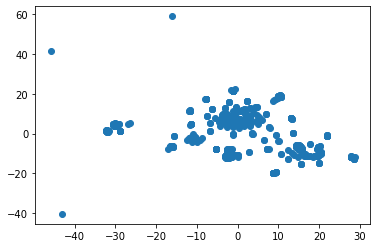

In [142]:
#Visualize the clusters
plt.scatter(X, y)
plt.show()

##### Cluster Analysis with k-Means

C:\Users\Dylan2\anaconda3\envs\Project8\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


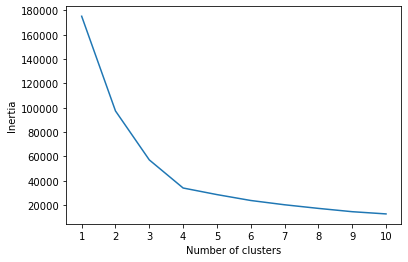

In [144]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

It seems from this elbow plot that clusters between 3-4 would be an appropriate number to cluster cryptocurrencies together.